In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_city_target_passenger_rating=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\city_target_passenger_rating.csv")
df_dim_city=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_city.csv")
df_dim_date=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_date.csv")
df_dim_repeat_trip_distribution=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_repeat_trip_distribution.csv")
df_fact_passenger_summary=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\fact_passenger_summary.csv")
df_fact_trips=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\fact_trips.csv")
df_monthly_target_new_passengers=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\monthly_target_new_passengers.csv")
df_monthly_target_trips=pd.read_csv(r"C:\Users\user\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\monthly_target_trips.csv")


1>>

In [5]:
df_dim_city

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore
5,CH01,Chandigarh
6,GJ02,Vadodara
7,AP01,Visakhapatnam
8,TN01,Coimbatore
9,KA01,Mysore


In [6]:
df_fact_trips.head(2)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5


In [7]:
df_trip_city=pd.merge(df_fact_trips,df_dim_city,on='city_id')

In [8]:
df_trip_city.head(2)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow
1,TRPLUC240327a61cfe66,2024-03-27,UP01,new,5,71,7,8,Lucknow


In [9]:
print()
print('   TOP 3 CITIES WITH TOTAL TRIPS')
df_trip_city.groupby(['city_name'])['trip_id'].count().sort_values(ascending=False).head(3).reset_index()



   TOP 3 CITIES WITH TOTAL TRIPS


,city_name,trip_id
0,Jaipur,76888
1,Lucknow,64299
2,Surat,54843


In [10]:
print('Total Trips')
df_trip_city['trip_id'].count()

Total Trips


425903

In [11]:
print()
print('    BOTTOM 3 CITIES WITH TOTAL TRIPS')
df_trip_city.groupby(['city_name'])['trip_id'].count().sort_values().head(3).reset_index()


    BOTTOM 3 CITIES WITH TOTAL TRIPS


,city_name,trip_id
0,Mysore,16238
1,Coimbatore,21104
2,Visakhapatnam,28366


>>>>>>>>>>>>>>   2

In [12]:
print('Total Fare Amount(Revenue) in Rs')
df_trip_city['fare_amount'].sum()

Total Fare Amount(Revenue) in Rs


108188091

In [13]:
print('Total Distance travel in Kms')
df_trip_city['distance_travelled(km)'].sum()

Total Distance travel in Kms


8146320

In [14]:
print('Average amount per trip')
(df_trip_city['fare_amount'].sum()/df_trip_city['trip_id'].count()).round(2)

Average amount per trip


254.02

In [15]:
df_average_fare=df_trip_city.groupby('city_name').agg({'fare_amount':'mean','distance_travelled(km)':'mean'}).round(2).reset_index()

In [16]:
df_average_fare

,city_name,fare_amount,distance_travelled(km)
0,Chandigarh,283.69,23.52
1,Coimbatore,166.98,14.98
2,Indore,179.84,16.50
3,Jaipur,483.92,30.02
4,Kochi,335.25,24.07
5,Lucknow,147.18,12.51
6,Mysore,249.71,16.50
7,Surat,117.27,11.00
8,Vadodara,118.57,11.52
9,Visakhapatnam,282.67,22.55


In [17]:
df_average_fare['fare_per_km']=(df_average_fare['fare_amount']/df_average_fare['distance_travelled(km)']).round(2)

In [18]:
print()
print('The average Lowest fare/trip is for Surat city')
print('The average highest fare/trip is for Jaipur city')

print('But....The effeciency of trip tops for Jaipur/Mysore & Kochi cities')
print()
df_average_fare.sort_values(by='fare_per_km',ascending=False).reset_index()


The average Lowest fare/trip is for Surat city
The average highest fare/trip is for Jaipur city
But....The effeciency of trip tops for Jaipur/Mysore & Kochi cities



,index,city_name,fare_amount,distance_travelled(km),fare_per_km
0,3,Jaipur,483.92,30.02,16.12
1,6,Mysore,249.71,16.50,15.13
2,4,Kochi,335.25,24.07,13.93
3,9,Visakhapatnam,282.67,22.55,12.54
4,0,Chandigarh,283.69,23.52,12.06
5,5,Lucknow,147.18,12.51,11.76
6,1,Coimbatore,166.98,14.98,11.15
7,2,Indore,179.84,16.50,10.90
8,7,Surat,117.27,11.00,10.66
9,8,Vadodara,118.57,11.52,10.29


>>>>>.>>>>>  3

In [19]:
df_passenger_rating=round(df_trip_city.groupby(['city_name','passenger_type']).agg({'passenger_rating':'mean'}).sort_values(by='passenger_rating',ascending=False),2).reset_index()

In [20]:
print()
print('Passenge ratings are more in touriest cities and new customers --jaipur/mysore & kochi')
df_passenger_rating.head(10)


Passenge ratings are more in touriest cities and new customers --jaipur/mysore & kochi


,city_name,passenger_type,passenger_rating
0,Kochi,new,8.99
1,Jaipur,new,8.99
2,Mysore,new,8.98
3,Visakhapatnam,new,8.98
4,Chandigarh,new,8.49
5,Indore,new,8.49
6,Coimbatore,new,8.49
7,Kochi,repeated,8.00
8,Jaipur,repeated,7.99
9,Visakhapatnam,repeated,7.99


In [21]:
print('Average Passanger Ratings')
df_trip_city['passenger_rating'].mean().round(2)

Average Passanger Ratings


7.66

In [22]:
print('Average Driver Ratings')
df_trip_city['driver_rating'].mean().round(2)

Average Driver Ratings


7.83

In [23]:
df_driver_rating=df_trip_city.groupby(['city_name','passenger_type'])['driver_rating'].mean().round(2).sort_values(ascending=False).reset_index()

In [24]:
print()
print('Driver ratings are average in all types')
df_driver_rating.head(10)


Driver ratings are average in all types


,city_name,passenger_type,driver_rating
0,Visakhapatnam,repeated,8.99
1,Kochi,new,8.99
2,Kochi,repeated,8.99
3,Jaipur,new,8.99
4,Visakhapatnam,new,8.98
5,Mysore,new,8.98
6,Jaipur,repeated,8.98
7,Mysore,repeated,8.97
8,Chandigarh,new,7.99
9,Coimbatore,new,7.99


 >>>>>>>>>>>>>>>>>>>>>>>>  4

In [25]:
df_trip_city['date']=pd.to_datetime(df_trip_city['date'])

In [26]:
df_trip_city['month']=df_trip_city['date'].dt.month

In [27]:
df_trip_city.head(2)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,month
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,1
1,TRPLUC240327a61cfe66,2024-03-27,UP01,new,5,71,7,8,Lucknow,3


In [28]:
dfa=df_trip_city.groupby(['city_name'])['month'].value_counts().reset_index()

In [29]:
dfa

,city_name,month,count
0,Chandigarh,2,7387
1,Chandigarh,1,6810
2,Chandigarh,5,6620
3,Chandigarh,3,6569
4,Chandigarh,6,6029
5,Chandigarh,4,5566
6,Coimbatore,3,3680
7,Coimbatore,4,3661
8,Coimbatore,1,3651
9,Coimbatore,5,3550


<Axes: xlabel='month', ylabel='count'>

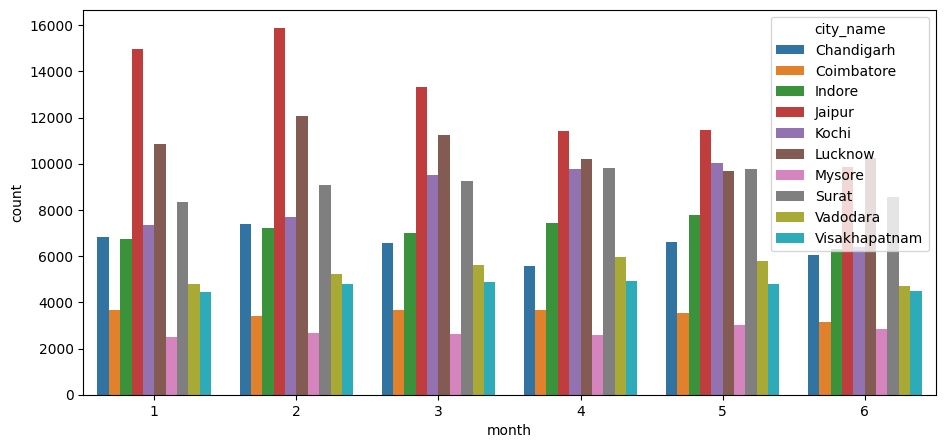

In [30]:
plt.figure(figsize=(11,5))
sns.barplot(dfa,x='month',y='count',hue='city_name')


vishakapatnam,mysore & coimbatore has average trips in all months whereas chandigarh,jaipur & lucknow are more in month january & feburary



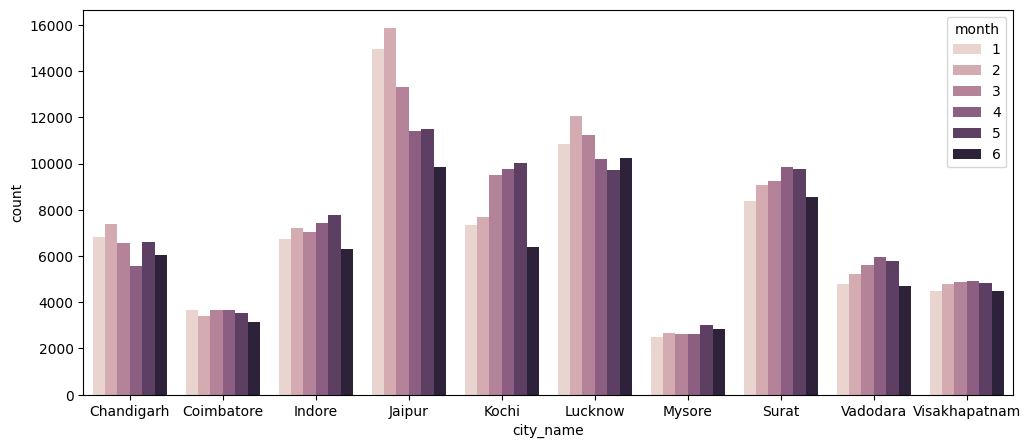

In [31]:
print()
print('vishakapatnam,mysore & coimbatore has average trips in all months whereas chandigarh,jaipur & lucknow are more in month january & feburary')
print()
plt.figure(figsize=(12,5))
sns.barplot(dfa,x='city_name',y='count',hue='month')
plt.show()

>>>>>>>>>>>>>>>>>>  5

In [32]:
df_dim_date['date']=pd.to_datetime(df_dim_date['date'])

In [33]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            182 non-null    datetime64[ns]
 1   start_of_month  182 non-null    object        
 2   month_name      182 non-null    object        
 3   day_type        182 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.8+ KB


In [34]:
df_daytype=pd .merge(df_trip_city,df_dim_date,on='date')

In [35]:
df_daytype.head(2)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,month,start_of_month,month_name,day_type
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,1,2024-01-01,January,Weekend
1,TRPLUC240113e0cd931a,2024-01-13,UP01,new,18,242,8,7,Lucknow,1,2024-01-01,January,Weekend


In [36]:
dfb=df_daytype.groupby(['city_name'])['day_type'].value_counts().reset_index()

In [37]:
dfb

,city_name,day_type,count
0,Chandigarh,Weekday,19914
1,Chandigarh,Weekend,19067
2,Coimbatore,Weekday,12576
3,Coimbatore,Weekend,8528
4,Indore,Weekend,21258
5,Indore,Weekday,21198
6,Jaipur,Weekend,44397
7,Jaipur,Weekday,32491
8,Kochi,Weekend,27787
9,Kochi,Weekday,22915


<Axes: xlabel='city_name', ylabel='count'>

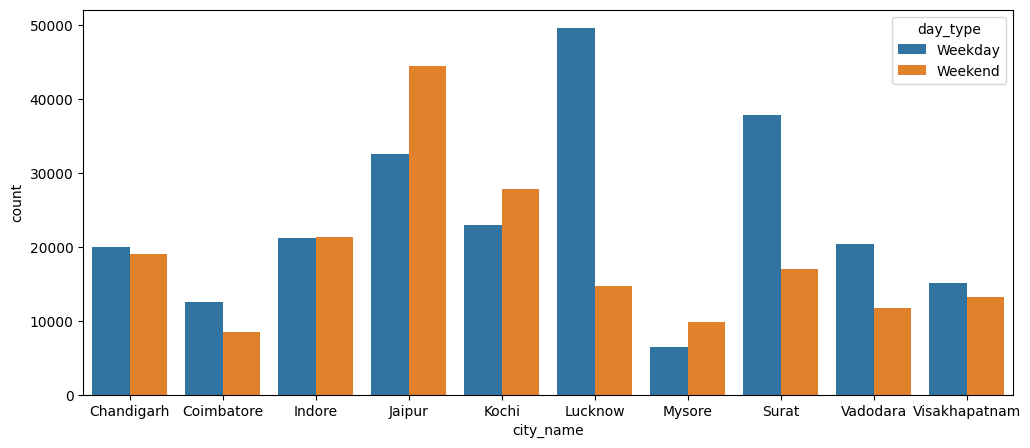

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(dfb,x='city_name',y='count',hue='day_type')

lucknow,surat and vadodra looks like business cities as weekdays trips are more 
jaipur cochi and mysore are weekend /touriest cities

>>>>>>>>>>>>>>>>  6

In [39]:
df_dim_repeat_trip_distribution

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38
...,...,...,...,...
535,2024-06-01,UP01,5-Trips,272
536,2024-06-01,UP01,6-Trips,272
537,2024-06-01,UP01,7-Trips,246
538,2024-06-01,UP01,8-Trips,83


In [40]:
df_repeat=pd.merge(df_dim_repeat_trip_distribution,df_dim_city,on='city_id')

In [41]:
df_repeat

,month,city_id,trip_count,repeat_passenger_count,city_name
0,2024-01-01,AP01,10-Trips,7,Visakhapatnam
1,2024-01-01,AP01,2-Trips,352,Visakhapatnam
2,2024-01-01,AP01,3-Trips,158,Visakhapatnam
3,2024-01-01,AP01,4-Trips,53,Visakhapatnam
4,2024-01-01,AP01,5-Trips,38,Visakhapatnam
...,...,...,...,...,...
535,2024-06-01,UP01,5-Trips,272,Lucknow
536,2024-06-01,UP01,6-Trips,272,Lucknow
537,2024-06-01,UP01,7-Trips,246,Lucknow
538,2024-06-01,UP01,8-Trips,83,Lucknow


In [42]:
df_city_Chandigarh=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Indore=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Jaipur=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Kochi=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Lucknow=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Mysore=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Surat=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Vadodara=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()
df_city_Visakhapatnam=df_repeat.groupby(['city_name','trip_count'])['repeat_passenger_count'].sum().reset_index()


In [43]:
df_c=df_city_Chandigarh[df_city_Chandigarh['city_name']=='Chandigarh']
df_i=df_city_Indore[df_city_Chandigarh['city_name']=='Indore']
df_j=df_city_Jaipur[df_city_Chandigarh['city_name']=='Jaipur']
df_k=df_city_Kochi[df_city_Chandigarh['city_name']=='Kochi']
df_l=df_city_Lucknow[df_city_Chandigarh['city_name']=='Lucknow']
df_m=df_city_Mysore[df_city_Chandigarh['city_name']=='Mysore']
df_s=df_city_Surat[df_city_Chandigarh['city_name']=='Surat']
df_va=df_city_Vadodara[df_city_Chandigarh['city_name']=='Vadodara']
df_v=df_city_Visakhapatnam[df_city_Chandigarh['city_name']=='Visakhapatnam']

In [44]:
df_c

,city_name,trip_count,repeat_passenger_count
0,Chandigarh,10-Trips,91
1,Chandigarh,2-Trips,1638
2,Chandigarh,3-Trips,976
3,Chandigarh,4-Trips,798
4,Chandigarh,5-Trips,619
5,Chandigarh,6-Trips,376
6,Chandigarh,7-Trips,278
7,Chandigarh,8-Trips,176
8,Chandigarh,9-Trips,118


In [45]:
df_c['repeat_percent']=((df_c['repeat_passenger_count']/df_c['repeat_passenger_count'].sum())*100).round(2)
df_i['repeat_percent']=((df_i['repeat_passenger_count']/df_i['repeat_passenger_count'].sum())*100).round(2)
df_j['repeat_percent']=((df_j['repeat_passenger_count']/df_j['repeat_passenger_count'].sum())*100).round(2)
df_k['repeat_percent']=((df_k['repeat_passenger_count']/df_k['repeat_passenger_count'].sum())*100).round(2)
df_l['repeat_percent']=((df_l['repeat_passenger_count']/df_l['repeat_passenger_count'].sum())*100).round(2)
df_m['repeat_percent']=((df_m['repeat_passenger_count']/df_m['repeat_passenger_count'].sum())*100).round(2)
df_s['repeat_percent']=((df_s['repeat_passenger_count']/df_s['repeat_passenger_count'].sum())*100).round(2)
df_va['repeat_percent']=((df_va['repeat_passenger_count']/df_va['repeat_passenger_count'].sum())*100).round(2)
df_v['repeat_percent']=((df_v['repeat_passenger_count']/df_v['repeat_passenger_count'].sum())*100).round(2)

C:\Users\user\AppData\Local\Temp\ipykernel_16748\2942300459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['repeat_percent']=((df_c['repeat_passenger_count']/df_c['repeat_passenger_count'].sum())*100).round(2)
C:\Users\user\AppData\Local\Temp\ipykernel_16748\2942300459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['repeat_percent']=((df_i['repeat_passenger_count']/df_i['repeat_passenger_count'].sum())*100).round(2)
C:\Users\user\AppData\Local\Temp\ipykernel_16748\2942300459.py:3: Settin

In [46]:
df_c.reset_index()
df_i.reset_index()

,index,city_name,trip_count,repeat_passenger_count,repeat_percent
0,18,Indore,10-Trips,109,1.51
1,19,Indore,2-Trips,2478,34.34
2,20,Indore,3-Trips,1637,22.69
3,21,Indore,4-Trips,967,13.40
4,22,Indore,5-Trips,746,10.34
5,23,Indore,6-Trips,494,6.85
6,24,Indore,7-Trips,378,5.24
7,25,Indore,8-Trips,235,3.26
8,26,Indore,9-Trips,172,2.38


In [47]:
df_c.sort_values(by='repeat_percent')

,city_name,trip_count,repeat_passenger_count,repeat_percent
0,Chandigarh,10-Trips,91,1.79
8,Chandigarh,9-Trips,118,2.33
7,Chandigarh,8-Trips,176,3.47
6,Chandigarh,7-Trips,278,5.48
5,Chandigarh,6-Trips,376,7.42
4,Chandigarh,5-Trips,619,12.21
3,Chandigarh,4-Trips,798,15.74
2,Chandigarh,3-Trips,976,19.25
1,Chandigarh,2-Trips,1638,32.31


In [48]:
print()
print('Surat/Vadodra/indore/chandigarh/luckhnow are more with higer trip frequency WITH 10 & 9 TRIPS (business cities) and less with 2 & 3 trips....')
print('jaipur/kochi/vishakpatnam/mysore are more with 2 & 3 TRIPS nas less with 19 & 9 trips(touriest cities)')
print()
df_c.reset_index()#,df_i,df_j,df_k,df_l,df_m,df_s,df_va,df_v


Surat/Vadodra/indore/chandigarh/luckhnow are more with higer trip frequency WITH 10 & 9 TRIPS (business cities) and less with 2 & 3 trips....
jaipur/kochi/vishakpatnam/mysore are more with 2 & 3 TRIPS nas less with 19 & 9 trips(touriest cities)



,index,city_name,trip_count,repeat_passenger_count,repeat_percent
0,0,Chandigarh,10-Trips,91,1.79
1,1,Chandigarh,2-Trips,1638,32.31
2,2,Chandigarh,3-Trips,976,19.25
3,3,Chandigarh,4-Trips,798,15.74
4,4,Chandigarh,5-Trips,619,12.21
5,5,Chandigarh,6-Trips,376,7.42
6,6,Chandigarh,7-Trips,278,5.48
7,7,Chandigarh,8-Trips,176,3.47
8,8,Chandigarh,9-Trips,118,2.33


In [49]:
df_c.reset_index(),df_i.reset_index(),df_j.reset_index(),df_k.reset_index(),df_l.reset_index(),df_m.reset_index(),df_s.reset_index(),df_va.reset_index(),df_v.reset_index()

(   index   city_name trip_count  repeat_passenger_count  repeat_percent
 0      0  Chandigarh   10-Trips                      91            1.79
 1      1  Chandigarh    2-Trips                    1638           32.31
 2      2  Chandigarh    3-Trips                     976           19.25
 3      3  Chandigarh    4-Trips                     798           15.74
 4      4  Chandigarh    5-Trips                     619           12.21
 5      5  Chandigarh    6-Trips                     376            7.42
 6      6  Chandigarh    7-Trips                     278            5.48
 7      7  Chandigarh    8-Trips                     176            3.47
 8      8  Chandigarh    9-Trips                     118            2.33,
    index city_name trip_count  repeat_passenger_count  repeat_percent
 0     18    Indore   10-Trips                     109            1.51
 1     19    Indore    2-Trips                    2478           34.34
 2     20    Indore    3-Trips                    1637  

In [50]:
df_v.reset_index()

,index,city_name,trip_count,repeat_passenger_count,repeat_percent
0,81,Visakhapatnam,10-Trips,47,0.92
1,82,Visakhapatnam,2-Trips,2618,51.25
2,83,Visakhapatnam,3-Trips,1275,24.96
3,84,Visakhapatnam,4-Trips,510,9.98
4,85,Visakhapatnam,5-Trips,278,5.44
5,86,Visakhapatnam,6-Trips,163,3.19
6,87,Visakhapatnam,7-Trips,101,1.98
7,88,Visakhapatnam,8-Trips,71,1.39
8,89,Visakhapatnam,9-Trips,45,0.88


7 >>

In [51]:
df_monthly_target_trips

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000
5,2024-02-01,UP01,13000
6,2024-01-01,AP01,4500
7,2024-01-01,CH01,7000
8,2024-02-01,KL01,7500
9,2024-03-01,UP01,13000


In [52]:
df_monthly_target_trips['month']=pd.to_datetime(df_monthly_target_trips['month'])

In [53]:
df_monthly_target_trips

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000
5,2024-02-01,UP01,13000
6,2024-01-01,AP01,4500
7,2024-01-01,CH01,7000
8,2024-02-01,KL01,7500
9,2024-03-01,UP01,13000


In [54]:
df_monthly_target_trips['months']=df_monthly_target_trips['month'].dt.month

In [55]:
df_monthly_target_trips

,month,city_id,total_target_trips,months
0,2024-03-01,MP01,7000,3
1,2024-05-01,KA01,2500,5
2,2024-04-01,UP01,11000,4
3,2024-02-01,GJ02,6000,2
4,2024-05-01,KL01,9000,5
5,2024-02-01,UP01,13000,2
6,2024-01-01,AP01,4500,1
7,2024-01-01,CH01,7000,1
8,2024-02-01,KL01,7500,2
9,2024-03-01,UP01,13000,3


In [56]:
df_monthly_target_trips1=pd.merge(df_monthly_target_trips,df_dim_city,on='city_id')

In [57]:
df_monthly_target_trips1

,month,city_id,total_target_trips,months,city_name
0,2024-03-01,MP01,7000,3,Indore
1,2024-04-01,MP01,7500,4,Indore
2,2024-02-01,MP01,7000,2,Indore
3,2024-05-01,MP01,7500,5,Indore
4,2024-06-01,MP01,7500,6,Indore
5,2024-01-01,MP01,7000,1,Indore
6,2024-05-01,KA01,2500,5,Mysore
7,2024-04-01,KA01,2500,4,Mysore
8,2024-03-01,KA01,2000,3,Mysore
9,2024-02-01,KA01,2000,2,Mysore


In [58]:
df_monthly_target_trips11=df_monthly_target_trips1.groupby(['city_id','city_name','months'])['total_target_trips'].sum().reset_index()

In [59]:
df_a=df_monthly_target_trips11.sort_values(by='city_name').reset_index()

In [60]:
df_a

,index,city_id,city_name,months,total_target_trips
0,6,CH01,Chandigarh,1,7000
1,7,CH01,Chandigarh,2,7000
2,8,CH01,Chandigarh,3,7000
3,9,CH01,Chandigarh,4,6000
4,10,CH01,Chandigarh,5,6000
5,11,CH01,Chandigarh,6,6000
6,51,TN01,Coimbatore,4,3500
7,53,TN01,Coimbatore,6,3500
8,52,TN01,Coimbatore,5,3500
9,48,TN01,Coimbatore,1,3500


In [61]:
df_a

,index,city_id,city_name,months,total_target_trips
0,6,CH01,Chandigarh,1,7000
1,7,CH01,Chandigarh,2,7000
2,8,CH01,Chandigarh,3,7000
3,9,CH01,Chandigarh,4,6000
4,10,CH01,Chandigarh,5,6000
5,11,CH01,Chandigarh,6,6000
6,51,TN01,Coimbatore,4,3500
7,53,TN01,Coimbatore,6,3500
8,52,TN01,Coimbatore,5,3500
9,48,TN01,Coimbatore,1,3500


In [62]:
df_trip_city.head(2)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name,month
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow,1
1,TRPLUC240327a61cfe66,2024-03-27,UP01,new,5,71,7,8,Lucknow,3


In [63]:
df_new=df_trip_city[['trip_id','date','city_id']]

In [64]:
df_new

,trip_id,date,city_id
0,TRPLUC240113d55de2fb,2024-01-13,UP01
1,TRPLUC240327a61cfe66,2024-03-27,UP01
2,TRPLUC240322c73f8439,2024-03-22,UP01
3,TRPLUC240420c114cb02,2024-04-20,UP01
4,TRPLUC2405094011dfa0,2024-05-09,UP01
...,...,...,...
425898,TRPIND24020362419062,2024-02-03,MP01
425899,TRPIND240415f9e8de6d,2024-04-15,MP01
425900,TRPIND240127ffcd5790,2024-01-27,MP01
425901,TRPIND240122c53517b1,2024-01-22,MP01


In [65]:
df_new['months']=df_new['date'].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_16748\587470632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['months']=df_new['date'].dt.month


In [66]:
df_new

,trip_id,date,city_id,months
0,TRPLUC240113d55de2fb,2024-01-13,UP01,1
1,TRPLUC240327a61cfe66,2024-03-27,UP01,3
2,TRPLUC240322c73f8439,2024-03-22,UP01,3
3,TRPLUC240420c114cb02,2024-04-20,UP01,4
4,TRPLUC2405094011dfa0,2024-05-09,UP01,5
...,...,...,...,...
425898,TRPIND24020362419062,2024-02-03,MP01,2
425899,TRPIND240415f9e8de6d,2024-04-15,MP01,4
425900,TRPIND240127ffcd5790,2024-01-27,MP01,1
425901,TRPIND240122c53517b1,2024-01-22,MP01,1


In [67]:
df_new1=pd.merge(df_dim_city,df_new,on='city_id')

In [68]:
df_new1.head(2)

,city_id,city_name,trip_id,date,months
0,RJ01,Jaipur,TRPJAI2402294d7117f1,2024-02-29,2
1,RJ01,Jaipur,TRPJAI2402044fad4efc,2024-02-04,2


In [69]:
df_month_city_trips=df_new1.groupby(['city_name','months','city_id'])['trip_id'].count().reset_index()

In [70]:
df_b=df_month_city_trips.sort_values(by='city_name').reset_index(drop=True)

In [71]:
df_b

,city_name,months,city_id,trip_id
0,Chandigarh,1,CH01,6810
1,Chandigarh,2,CH01,7387
2,Chandigarh,3,CH01,6569
3,Chandigarh,4,CH01,5566
4,Chandigarh,5,CH01,6620
5,Chandigarh,6,CH01,6029
6,Coimbatore,1,TN01,3651
7,Coimbatore,2,TN01,3404
8,Coimbatore,3,TN01,3680
9,Coimbatore,4,TN01,3661


In [72]:
df_a

,index,city_id,city_name,months,total_target_trips
0,6,CH01,Chandigarh,1,7000
1,7,CH01,Chandigarh,2,7000
2,8,CH01,Chandigarh,3,7000
3,9,CH01,Chandigarh,4,6000
4,10,CH01,Chandigarh,5,6000
5,11,CH01,Chandigarh,6,6000
6,51,TN01,Coimbatore,4,3500
7,53,TN01,Coimbatore,6,3500
8,52,TN01,Coimbatore,5,3500
9,48,TN01,Coimbatore,1,3500


In [73]:
df_a=df_monthly_target_trips11.sort_values(by='city_name').reset_index(drop=True)

In [74]:
df_a

,city_id,city_name,months,total_target_trips
0,CH01,Chandigarh,1,7000
1,CH01,Chandigarh,2,7000
2,CH01,Chandigarh,3,7000
3,CH01,Chandigarh,4,6000
4,CH01,Chandigarh,5,6000
5,CH01,Chandigarh,6,6000
6,TN01,Coimbatore,4,3500
7,TN01,Coimbatore,6,3500
8,TN01,Coimbatore,5,3500
9,TN01,Coimbatore,1,3500


In [75]:
df_city_month_trip=pd.merge(df_a,df_b)

In [76]:
df_city_month_trip

,city_id,city_name,months,total_target_trips,trip_id
0,CH01,Chandigarh,1,7000,6810
1,CH01,Chandigarh,2,7000,7387
2,CH01,Chandigarh,3,7000,6569
3,CH01,Chandigarh,4,6000,5566
4,CH01,Chandigarh,5,6000,6620
5,CH01,Chandigarh,6,6000,6029
6,TN01,Coimbatore,4,3500,3661
7,TN01,Coimbatore,6,3500,3158
8,TN01,Coimbatore,5,3500,3550
9,TN01,Coimbatore,1,3500,3651


In [77]:
df_city_month_trip['trip_actual_vs_target_%']=((df_city_month_trip['trip_id']/df_city_month_trip['total_target_trips'])*100).round(2)

In [78]:
df_city_month_trip

,city_id,city_name,months,total_target_trips,trip_id,trip_actual_vs_target_%
0,CH01,Chandigarh,1,7000,6810,97.29
1,CH01,Chandigarh,2,7000,7387,105.53
2,CH01,Chandigarh,3,7000,6569,93.84
3,CH01,Chandigarh,4,6000,5566,92.77
4,CH01,Chandigarh,5,6000,6620,110.33
5,CH01,Chandigarh,6,6000,6029,100.48
6,TN01,Coimbatore,4,3500,3661,104.60
7,TN01,Coimbatore,6,3500,3158,90.23
8,TN01,Coimbatore,5,3500,3550,101.43
9,TN01,Coimbatore,1,3500,3651,104.31


In [79]:
#df_city_month_trip.to_csv('df_city_month_trip.csv')

>>>>>>>>>> 7 new passanger_target

>>>>>>>

In [80]:
df_monthly_target_new_passengers

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000
5,2024-01-01,AP01,2500
6,2024-03-01,MP01,2700
7,2024-06-01,CH01,3000
8,2024-04-01,AP01,2000
9,2024-01-01,KA01,2000


In [81]:
df_monthly_target_new_passengers1=df_monthly_target_new_passengers[['city_id','target_new_passengers','month']]

In [82]:
df_monthly_target_new_passengers1

,city_id,target_new_passengers,month
0,GJ01,1500,2024-05-01
1,GJ02,1500,2024-05-01
2,GJ01,2000,2024-03-01
3,UP01,2000,2024-05-01
4,MP01,2000,2024-05-01
5,AP01,2500,2024-01-01
6,MP01,2700,2024-03-01
7,CH01,3000,2024-06-01
8,AP01,2000,2024-04-01
9,KA01,2000,2024-01-01


In [83]:
df_fact_passenger_summary

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129
5,2024-01-01,KL01,4865,795,5660
6,2024-01-01,MP01,2843,1033,3876
7,2024-01-01,RJ01,10423,1422,11845
8,2024-01-01,TN01,1822,392,2214
9,2024-01-01,UP01,3465,1431,4896


In [84]:
df_fact_passenger_summary1=df_fact_passenger_summary[['city_id','new_passengers','month']]

In [85]:
df_fact_passenger_summary1

,city_id,new_passengers,month
0,AP01,2513,2024-01-01
1,CH01,3920,2024-01-01
2,GJ01,2432,2024-01-01
3,GJ02,2089,2024-01-01
4,KA01,1957,2024-01-01
5,KL01,4865,2024-01-01
6,MP01,2843,2024-01-01
7,RJ01,10423,2024-01-01
8,TN01,1822,2024-01-01
9,UP01,3465,2024-01-01


In [86]:
df_fact_passenger_summary11=df_fact_passenger_summary1.groupby(['city_id','month'])['new_passengers'].mean().reset_index()

In [87]:
df_fact_passenger_summary11

,city_id,month,new_passengers
0,AP01,2024-01-01,2513.0
1,AP01,2024-02-01,2380.0
2,AP01,2024-03-01,2170.0
3,AP01,2024-04-01,1845.0
4,AP01,2024-05-01,1939.0
5,AP01,2024-06-01,1900.0
6,CH01,2024-01-01,3920.0
7,CH01,2024-02-01,4104.0
8,CH01,2024-03-01,3228.0
9,CH01,2024-04-01,2496.0


In [88]:
df_new_passanger=pd.merge(df_fact_passenger_summary11,df_monthly_target_new_passengers1)

In [89]:
df_new_passanger

,city_id,month,new_passengers,target_new_passengers
0,AP01,2024-01-01,2513.0,2500
1,AP01,2024-02-01,2380.0,2500
2,AP01,2024-03-01,2170.0,2500
3,AP01,2024-04-01,1845.0,2000
4,AP01,2024-05-01,1939.0,2000
5,AP01,2024-06-01,1900.0,2000
6,CH01,2024-01-01,3920.0,4000
7,CH01,2024-02-01,4104.0,4000
8,CH01,2024-03-01,3228.0,4000
9,CH01,2024-04-01,2496.0,3000


>>>>>>>>>>>>7 ratings

>>>>>>>>>>>>>>

In [90]:
df_city_target_passenger_rating

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50
3,MP01,8.00
4,RJ01,8.25
5,KA01,8.50
6,GJ01,7.00
7,TN01,8.25
8,KL01,8.50
9,GJ02,7.50


In [91]:
df_fact_trips.head(3)

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8


In [92]:
df_fact_trips1=df_fact_trips[['date','city_id','passenger_rating','driver_rating']]

In [93]:
df_fact_trips1.head(5)

,date,city_id,passenger_rating,driver_rating
0,2024-01-13,UP01,5,5
1,2024-01-29,GJ02,5,5
2,2024-01-07,TN01,8,8
3,2024-03-25,KL01,9,10
4,2024-06-02,AP01,8,8


In [94]:
df_fact_trips1['date']=pd.to_datetime(df_fact_trips1['date'])

C:\Users\user\AppData\Local\Temp\ipykernel_16748\3586695822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_trips1['date']=pd.to_datetime(df_fact_trips1['date'])


In [95]:
df_fact_trips1['months']=df_fact_trips1['date'].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_16748\2897716832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fact_trips1['months']=df_fact_trips1['date'].dt.month


In [96]:
df_fact_trips1.head(5)

,date,city_id,passenger_rating,driver_rating,months
0,2024-01-13,UP01,5,5,1
1,2024-01-29,GJ02,5,5,1
2,2024-01-07,TN01,8,8,1
3,2024-03-25,KL01,9,10,3
4,2024-06-02,AP01,8,8,6


In [97]:
df_actual=pd.merge(df_dim_city,df_fact_trips1,on='city_id')

In [98]:
df_actual.head(5)

,city_id,city_name,date,passenger_rating,driver_rating,months
0,RJ01,Jaipur,2024-02-29,10,9,2
1,RJ01,Jaipur,2024-02-04,9,8,2
2,RJ01,Jaipur,2024-01-28,9,9,1
3,RJ01,Jaipur,2024-04-01,8,8,4
4,RJ01,Jaipur,2024-03-04,9,10,3


In [99]:
df_actual1=df_actual.groupby(['city_name','months','city_id']).agg({'passenger_rating':'mean'}).reset_index().round(2)

In [100]:
df_actual1

,city_name,months,city_id,passenger_rating
0,Chandigarh,1,CH01,8.07
1,Chandigarh,2,CH01,8.03
2,Chandigarh,3,CH01,8.00
3,Chandigarh,4,CH01,7.94
4,Chandigarh,5,CH01,7.91
5,Chandigarh,6,CH01,7.89
6,Coimbatore,1,TN01,7.98
7,Coimbatore,2,TN01,7.95
8,Coimbatore,3,TN01,7.91
9,Coimbatore,4,TN01,7.84


In [101]:
df_city_month_ratings=pd.merge(df_city_target_passenger_rating,df_actual1,on='city_id')

In [102]:
df_city_month_ratings['achived %']=((df_city_month_ratings['passenger_rating']/df_city_month_ratings['target_avg_passenger_rating'])*100).round(2)

In [103]:
df_city_month_ratings[['city_name','months','achived %']]

,city_name,months,achived %
0,Chandigarh,1,100.88
1,Chandigarh,2,100.37
2,Chandigarh,3,100.00
3,Chandigarh,4,99.25
4,Chandigarh,5,98.88
5,Chandigarh,6,98.62
6,Lucknow,1,91.31
7,Lucknow,2,90.62
8,Lucknow,3,90.21
9,Lucknow,4,88.97


<Axes: xlabel='city_name', ylabel='passenger_rating'>

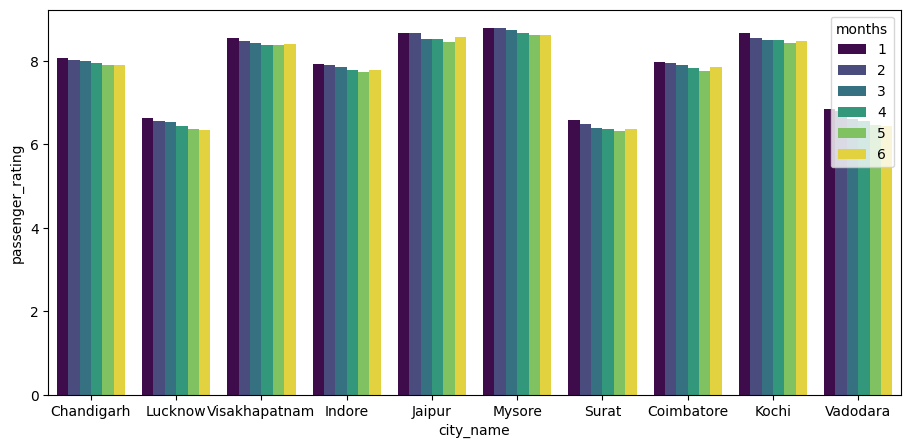

In [104]:
plt.figure(figsize=(11,5))
sns.barplot(df_city_month_ratings,x='city_name',y='passenger_rating',hue='months',palette='viridis')

>>>>>>>>>>>>   8 >>> repeat passanger RPR city

In [105]:
df_fact_passenger_summary

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129
5,2024-01-01,KL01,4865,795,5660
6,2024-01-01,MP01,2843,1033,3876
7,2024-01-01,RJ01,10423,1422,11845
8,2024-01-01,TN01,1822,392,2214
9,2024-01-01,UP01,3465,1431,4896


In [106]:
df_fact_passenger_summary['RPR']=((df_fact_passenger_summary['repeat_passengers']/df_fact_passenger_summary['total_passengers'])*100).round(2)

In [107]:
df_fact_passenger_summary

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR
0,2024-01-01,AP01,2513,650,3163,20.55
1,2024-01-01,CH01,3920,720,4640,15.52
2,2024-01-01,GJ01,2432,1184,3616,32.74
3,2024-01-01,GJ02,2089,544,2633,20.66
4,2024-01-01,KA01,1957,172,2129,8.08
5,2024-01-01,KL01,4865,795,5660,14.05
6,2024-01-01,MP01,2843,1033,3876,26.65
7,2024-01-01,RJ01,10423,1422,11845,12.01
8,2024-01-01,TN01,1822,392,2214,17.71
9,2024-01-01,UP01,3465,1431,4896,29.23


In [108]:
df_dim_city

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore
5,CH01,Chandigarh
6,GJ02,Vadodara
7,AP01,Visakhapatnam
8,TN01,Coimbatore
9,KA01,Mysore


In [109]:
df_rpr=pd.merge(df_fact_passenger_summary,df_dim_city,on='city_id')

In [110]:
df_rpr

,month,city_id,new_passengers,repeat_passengers,total_passengers,RPR,city_name
0,2024-01-01,AP01,2513,650,3163,20.55,Visakhapatnam
1,2024-02-01,AP01,2380,790,3170,24.92,Visakhapatnam
2,2024-03-01,AP01,2170,923,3093,29.84,Visakhapatnam
3,2024-04-01,AP01,1845,992,2837,34.97,Visakhapatnam
4,2024-05-01,AP01,1939,951,2890,32.91,Visakhapatnam
5,2024-06-01,AP01,1900,802,2702,29.68,Visakhapatnam
6,2024-01-01,CH01,3920,720,4640,15.52,Chandigarh
7,2024-02-01,CH01,4104,853,4957,17.21,Chandigarh
8,2024-03-01,CH01,3228,872,4100,21.27,Chandigarh
9,2024-04-01,CH01,2496,789,3285,24.02,Chandigarh


In [111]:
df_citywise=df_rpr[['city_name','month','RPR']]

In [112]:
df_citywise

,city_name,month,RPR
0,Visakhapatnam,2024-01-01,20.55
1,Visakhapatnam,2024-02-01,24.92
2,Visakhapatnam,2024-03-01,29.84
3,Visakhapatnam,2024-04-01,34.97
4,Visakhapatnam,2024-05-01,32.91
5,Visakhapatnam,2024-06-01,29.68
6,Chandigarh,2024-01-01,15.52
7,Chandigarh,2024-02-01,17.21
8,Chandigarh,2024-03-01,21.27
9,Chandigarh,2024-04-01,24.02


In [113]:
Visakhapatnam=df_citywise[df_citywise['city_name']== 'Visakhapatnam'].sort_values(by='RPR',ascending=False)
Chandigarh=df_citywise[df_citywise['city_name']== 'Chandigarh'].sort_values(by='RPR',ascending=False)
Surat=df_citywise[df_citywise['city_name']== 'Surat'].sort_values(by='RPR',ascending=False)
Vadodara=df_citywise[df_citywise['city_name']== 'Vadodara'].sort_values(by='RPR',ascending=False)
Mysore=df_citywise[df_citywise['city_name']== 'Mysore'].sort_values(by='RPR',ascending=False)
Kochi=df_citywise[df_citywise['city_name']== 'Kochi'].sort_values(by='RPR',ascending=False)
Indore=df_citywise[df_citywise['city_name']== 'Indore'].sort_values(by='RPR',ascending=False)
Jaipur=df_citywise[df_citywise['city_name']== 'Jaipur'].sort_values(by='RPR',ascending=False)
Coimbatore=df_citywise[df_citywise['city_name']== 'Coimbatore'].sort_values(by='RPR',ascending=False)
Lucknow=df_citywise[df_citywise['city_name']== 'Lucknow'].sort_values(by='RPR',ascending=False)

In [133]:
Visakhapatnam

,city_name,month,RPR
3,Visakhapatnam,2024-04-01,34.97
4,Visakhapatnam,2024-05-01,32.91
2,Visakhapatnam,2024-03-01,29.84
5,Visakhapatnam,2024-06-01,29.68
1,Visakhapatnam,2024-02-01,24.92
0,Visakhapatnam,2024-01-01,20.55


C:\Users\user\AppData\Local\Temp\ipykernel_16748\859276369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Visakhapatnam,x='month',y='RPR',palette='viridis')


<Axes: xlabel='month', ylabel='RPR'>

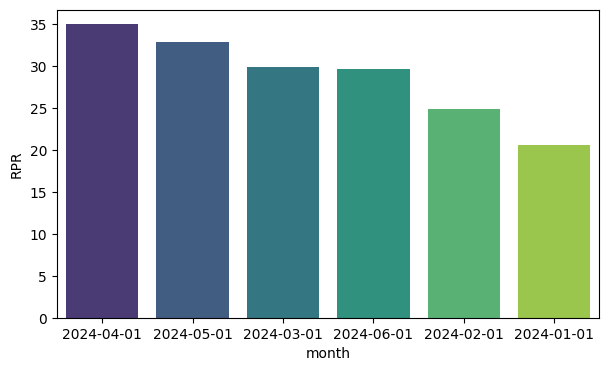

In [134]:
plt.figure(figsize=(7,4))

sns.barplot(Visakhapatnam,x='month',y='RPR',palette='viridis')


In [115]:
Chandigarh

,city_name,month,RPR
11,Chandigarh,2024-06-01,26.30
10,Chandigarh,2024-05-01,26.20
9,Chandigarh,2024-04-01,24.02
8,Chandigarh,2024-03-01,21.27
7,Chandigarh,2024-02-01,17.21
6,Chandigarh,2024-01-01,15.52


In [116]:
Surat

,city_name,month,RPR
16,Surat,2024-05-01,49.92
17,Surat,2024-06-01,49.17
15,Surat,2024-04-01,45.70
14,Surat,2024-03-01,43.43
13,Surat,2024-02-01,36.81
12,Surat,2024-01-01,32.74


In [117]:
Vadodara

,city_name,month,RPR
23,Vadodara,2024-06-01,38.90
22,Vadodara,2024-05-01,38.48
21,Vadodara,2024-04-01,34.49
20,Vadodara,2024-03-01,30.10
19,Vadodara,2024-02-01,22.13
18,Vadodara,2024-01-01,20.66


In [118]:
Mysore

,city_name,month,RPR
28,Mysore,2024-05-01,15.37
29,Mysore,2024-06-01,14.93
27,Mysore,2024-04-01,11.39
26,Mysore,2024-03-01,9.48
24,Mysore,2024-01-01,8.08
25,Mysore,2024-02-01,7.99


In [119]:
Kochi

,city_name,month,RPR
34,Kochi,2024-05-01,29.78
35,Kochi,2024-06-01,25.84
33,Kochi,2024-04-01,24.19
32,Kochi,2024-03-01,21.70
31,Kochi,2024-02-01,18.71
30,Kochi,2024-01-01,14.05


In [120]:
Indore

,city_name,month,RPR
40,Indore,2024-05-01,43.53
41,Indore,2024-06-01,35.88
39,Indore,2024-04-01,35.52
38,Indore,2024-03-01,28.46
37,Indore,2024-02-01,27.71
36,Indore,2024-01-01,26.65


In [121]:
Jaipur

,city_name,month,RPR
46,Jaipur,2024-05-01,25.68
45,Jaipur,2024-04-01,22.10
44,Jaipur,2024-03-01,19.88
47,Jaipur,2024-06-01,16.98
43,Jaipur,2024-02-01,13.34
42,Jaipur,2024-01-01,12.01


In [122]:
Coimbatore

,city_name,month,RPR
52,Coimbatore,2024-05-01,32.66
51,Coimbatore,2024-04-01,27.87
53,Coimbatore,2024-06-01,24.69
50,Coimbatore,2024-03-01,21.73
48,Coimbatore,2024-01-01,17.71
49,Coimbatore,2024-02-01,17.36


In [123]:
Lucknow

,city_name,month,RPR
58,Lucknow,2024-05-01,47.66
59,Lucknow,2024-06-01,46.70
57,Lucknow,2024-04-01,39.30
56,Lucknow,2024-03-01,33.93
55,Lucknow,2024-02-01,31.98
54,Lucknow,2024-01-01,29.23


In [124]:
df_rpr.groupby('city_name')['RPR'].mean().sort_values(ascending=False).reset_index().round(2).head(2)

,city_name,RPR
0,Surat,42.96
1,Lucknow,38.13


In [125]:
df_rpr.groupby('city_name')['RPR'].mean().sort_values(ascending=False).reset_index().round(2).tail(2)

,city_name,RPR
8,Jaipur,18.33
9,Mysore,11.21


>>>>>>>>>> 7 >>>>> repeat passenger monthly

In [126]:
df_rpr.groupby('month')['RPR'].mean().reset_index().sort_values(by='RPR',ascending=False)

,month,RPR
4,2024-05-01,34.219
5,2024-06-01,30.907
3,2024-04-01,29.955
2,2024-03-01,25.982
1,2024-02-01,21.816
0,2024-01-01,19.720
